# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from collections import Counter

## Data Importing

In [2]:
# load one file first to see what type of data and attributes
with open('../data/AK_Juneau_0.json', 'r') as f:
    data = json.load(f)

In [3]:
print(type(data))         # one file attribute
print(data.keys())        # top-level keys

<class 'dict'>
dict_keys(['status', 'data'])


In [4]:
#load json object
with open('../data/AK_Juneau_0.json') as f:
    nested_json = json.load(f)
print(nested_json)

#attribute of data
print(type(nested_json))

{'status': 200, 'data': {'total': 8, 'count': 8, 'results': [{'primary_photo': {'href': 'https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg'}, 'last_update_date': '2023-09-19T20:52:50Z', 'source': {'plan_id': None, 'agents': [{'office_name': 'EXP Realty LLC - Southeast Alaska'}, {'office_name': 'Non-Member Office'}], 'spec_id': None, 'type': 'mls'}, 'tags': ['carport', 'community_outdoor_space', 'cul_de_sac', 'family_room', 'hardwood_floors', 'hill_or_mountain_view', 'recreation_facilities', 'rv_or_boat_parking', 'basement', 'garage_1_or_more', 'two_or_more_stories', 'big_yard', 'high_ceiling', 'efficient', 'trails', 'shopping'], 'permalink': '9453-Herbert-Pl_Juneau_AK_99801_M90744-30767', 'status': 'sold', 'list_date': '2023-06-29T21:16:25.000000Z', 'open_houses': None, 'description': {'year_built': 1963, 'baths_3qtr': None, 'sold_date': '2023-09-18', 'sold_price': None, 'baths_full': 2, 'name': None, 'baths_half': None, 'lot_sqft': 10454, 'sqft': 1821

In [5]:
# load type of data and attributes of one file

# local JSON file
file_path = '../data/AK_Juneau_0.json'
with open(file_path, 'r') as f:
    data = json.load(f) 
    print(json.dumps(data, indent=4))

#attribute of data
print(type(data))

{
    "status": 200,
    "data": {
        "total": 8,
        "count": 8,
        "results": [
            {
                "primary_photo": {
                    "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
                },
                "last_update_date": "2023-09-19T20:52:50Z",
                "source": {
                    "plan_id": null,
                    "agents": [
                        {
                            "office_name": "EXP Realty LLC - Southeast Alaska"
                        },
                        {
                            "office_name": "Non-Member Office"
                        }
                    ],
                    "spec_id": null,
                    "type": "mls"
                },
                "tags": [
                    "carport",
                    "community_outdoor_space",
                    "cul_de_sac",
                    "family_room",
                    "hardwood_fl

In [6]:
print(data['data'].keys())  # subkeys under 'data' in single file

dict_keys(['total', 'count', 'results'])


In [7]:
#single item results list
results = data['data']['results']
print(type(results))           
print(len(results))            # listings
print(results[0].keys())       # Keys in first listing
print(json.dumps(results[0], indent=2))  # first result

<class 'list'>
8
dict_keys(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport'])
{
  "primary_photo": {
    "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
  },
  "last_update_date": "2023-09-19T20:52:50Z",
  "source": {
    "plan_id": null,
    "agents": [
      {
        "office_name": "EXP Realty LLC - Southeast Alaska"
      },
      {
        "office_name": "Non-Member Office"
      }
    ],
    "spec_id": null,
    "type": "mls"
  },
  "tags": [
    "carport",
    "community_outdoor_space",
    "cul_de_sac",
    "family_room",
    "hardwood_floors",
    "hill_or_mountain_view",
    "recreation_facilities",
    "rv_or_boat_parking",
    "basement",
    "garage_1_or_mor

In [8]:
#diagnostic workflow 
with open('../data/AK_Juneau_0.json') as f:
    data = json.load(f)

print(data.keys())
print(data['data'].keys())
print(type(data['data']['results']))     # should be list
print(data['data']['results'][0].keys()) # first result fields

dict_keys(['status', 'data'])
dict_keys(['total', 'count', 'results'])
<class 'list'>
dict_keys(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport'])


In [9]:
#all json files, including one file, into dataframe; loop through each file, extract results, convert to DF

# Path to your JSON files
data_folder = '../data'

# List all JSON files
json_files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

# Store all rows from all files
all_results = []

# Loop through each file
for filename in json_files:
    file_path = os.path.join(data_folder, filename)

    with open(file_path, 'r') as f:
        data = json.load(f)

    # Safely get the list of results
    results = data.get('data', {}).get('results', [])
    
    # Append each result to the master list
    all_results.extend(results)

# Convert the full list of results to a DataFrame
df = pd.DataFrame(all_results)

# Preview
print(df.shape)
print(df.head())

(8159, 23)
                                       primary_photo      last_update_date  \
0  {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bb...  2024-01-17T00:01:55Z   
1  {'href': 'https://ap.rdcpix.com/40c55dc5d4e29a...  2024-01-16T16:49:36Z   
2  {'href': 'https://ap.rdcpix.com/497a833c1c423b...  2024-01-13T00:03:39Z   
3  {'href': 'https://ap.rdcpix.com/ade15664a2e839...  2024-01-16T07:48:30Z   
4  {'href': 'https://ap.rdcpix.com/a5dada323a7e61...  2024-01-13T00:01:45Z   

                                              source  \
0  {'plan_id': None, 'agents': [{'office_name': N...   
1  {'plan_id': None, 'agents': [{'office_name': N...   
2  {'plan_id': None, 'agents': [{'office_name': N...   
3  {'plan_id': None, 'agents': [{'office_name': N...   
4  {'plan_id': None, 'agents': [{'office_name': N...   

                                                tags  \
0  [central_air, dishwasher, fireplace, forced_ai...   
1  [disability_features, basement, garage_1_or_mo...   
2  [carport, ce

In [10]:
df.columns

Index(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink',
       'status', 'list_date', 'open_houses', 'description', 'branding',
       'list_price', 'lead_attributes', 'property_id', 'photos', 'flags',
       'community', 'products', 'virtual_tours', 'other_listings',
       'listing_id', 'price_reduced_amount', 'location', 'matterport'],
      dtype='object')

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [11]:
df = pd.DataFrame(all_results)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary_photo         7403 non-null   object 
 1   last_update_date      8125 non-null   object 
 2   source                7752 non-null   object 
 3   tags                  7638 non-null   object 
 4   permalink             8159 non-null   object 
 5   status                8159 non-null   object 
 6   list_date             7752 non-null   object 
 7   open_houses           0 non-null      object 
 8   description           8159 non-null   object 
 9   branding              8159 non-null   object 
 10  list_price            7721 non-null   float64
 11  lead_attributes       8159 non-null   object 
 12  property_id           8159 non-null   object 
 13  photos                7403 non-null   object 
 14  flags                 8159 non-null   object 
 15  community            

In [12]:
df.shape

(8159, 23)

In [13]:
df.describe(include='all')

,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,description,branding,...,photos,flags,community,products,virtual_tours,other_listings,listing_id,price_reduced_amount,location,matterport
count,7403,8125,7752,7638,8159,8159,7752,0,8159,8159,...,7403,8159,5,7673,1351,7856,7752,2.484000e+03,8159,8159
unique,1627,1716,393,1628,1795,1,1636,0,1791,996,...,1627,6,1,4,290,1726,1704,NaN,1794,2
top,{'href': 'https://ap.rdcpix.com/6a9d57d5c31e4f...,2023-10-20,"{'plan_id': None, 'agents': [{'office_name': N...",[big_lot],12312-Birchfalls-Dr_Raleigh_NC_27614_M60077-26455,sold,2024-01-05T17:38:27.000000Z,NaN,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,"[{'tags': [{'label': 'unknown', 'probability':...","{'is_new_construction': None, 'is_for_rent': N...",{'advertisers': [{'office': {'hours': 'Monday ...,{'brand_name': 'essentials'},"[{'type': None, 'href': 'https://cambiomhc.com...","{'rdc': [{'listing_id': '2961896671', 'listing...",2954807059,NaN,"{'address': {'postal_code': '50036', 'state': ...",False
freq,5,95,5127,62,5,8159,80,NaN,10,434,...,5,5231,5,4900,20,5,5,NaN,7,7830
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.442704e+04,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.162396e+04,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.010000e+04,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+04,NaN,NaN


In [14]:
df.columns

Index(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink',
       'status', 'list_date', 'open_houses', 'description', 'branding',
       'list_price', 'lead_attributes', 'property_id', 'photos', 'flags',
       'community', 'products', 'virtual_tours', 'other_listings',
       'listing_id', 'price_reduced_amount', 'location', 'matterport'],
      dtype='object')

In [15]:
# cell value; false = cell does not contain list, true = cell contains list
df = pd.DataFrame(all_results)

# check if each cell contains a list
is_list = df.map(lambda x: isinstance(x, list))

# result
print(is_list)

      primary_photo  last_update_date  source   tags  permalink  status  \
0             False             False   False   True      False   False   
1             False             False   False   True      False   False   
2             False             False   False   True      False   False   
3             False             False   False   True      False   False   
4             False             False   False   True      False   False   
...             ...               ...     ...    ...        ...     ...   
8154          False             False   False  False      False   False   
8155          False             False   False   True      False   False   
8156          False             False   False   True      False   False   
8157          False             False   False   True      False   False   
8158          False             False   False   True      False   False   

      list_date  open_houses  description  branding  ...  photos  flags  \
0         False        F

In [16]:
#sold price print df head only - keep for reference re drop list price 
for index, row in df.head().iterrows():
    print(f"Row {index} - Sold Price: {row['description'].get('sold_price', 'Not Available')}")

Row 0 - Sold Price: 345000
Row 1 - Sold Price: 196000
Row 2 - Sold Price: 205000
Row 3 - Sold Price: 295000
Row 4 - Sold Price: 106000


In [17]:
#print df head with sales with or without sales price  
print(df.head())

                                       primary_photo      last_update_date  \
0  {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bb...  2024-01-17T00:01:55Z   
1  {'href': 'https://ap.rdcpix.com/40c55dc5d4e29a...  2024-01-16T16:49:36Z   
2  {'href': 'https://ap.rdcpix.com/497a833c1c423b...  2024-01-13T00:03:39Z   
3  {'href': 'https://ap.rdcpix.com/ade15664a2e839...  2024-01-16T07:48:30Z   
4  {'href': 'https://ap.rdcpix.com/a5dada323a7e61...  2024-01-13T00:01:45Z   

                                              source  \
0  {'plan_id': None, 'agents': [{'office_name': N...   
1  {'plan_id': None, 'agents': [{'office_name': N...   
2  {'plan_id': None, 'agents': [{'office_name': N...   
3  {'plan_id': None, 'agents': [{'office_name': N...   
4  {'plan_id': None, 'agents': [{'office_name': N...   

                                                tags  \
0  [central_air, dishwasher, fireplace, forced_ai...   
1  [disability_features, basement, garage_1_or_mo...   
2  [carport, central_air, 

In [18]:
#drop sales without sales price; print findings
def has_valid_sold_price(d):
    sold_price = d.get('sold_price', None)
    return sold_price not in [None, '', 0, '0']

#filter rows with invalid sold_price
filtered_df = df[df['description'].apply(has_valid_sold_price)]

#print df head findings
for index, row in filtered_df.head().iterrows():
    print(f"Row {index} - Sold Price: {row['description']['sold_price']}")

Row 0 - Sold Price: 345000
Row 1 - Sold Price: 196000
Row 2 - Sold Price: 205000
Row 3 - Sold Price: 295000
Row 4 - Sold Price: 106000


In [19]:
#print filtered df removing sales without sales price (includes removal empty or zero sales prices)
print(filtered_df.head())

                                       primary_photo      last_update_date  \
0  {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bb...  2024-01-17T00:01:55Z   
1  {'href': 'https://ap.rdcpix.com/40c55dc5d4e29a...  2024-01-16T16:49:36Z   
2  {'href': 'https://ap.rdcpix.com/497a833c1c423b...  2024-01-13T00:03:39Z   
3  {'href': 'https://ap.rdcpix.com/ade15664a2e839...  2024-01-16T07:48:30Z   
4  {'href': 'https://ap.rdcpix.com/a5dada323a7e61...  2024-01-13T00:01:45Z   

                                              source  \
0  {'plan_id': None, 'agents': [{'office_name': N...   
1  {'plan_id': None, 'agents': [{'office_name': N...   
2  {'plan_id': None, 'agents': [{'office_name': N...   
3  {'plan_id': None, 'agents': [{'office_name': N...   
4  {'plan_id': None, 'agents': [{'office_name': N...   

                                                tags  \
0  [central_air, dishwasher, fireplace, forced_ai...   
1  [disability_features, basement, garage_1_or_mo...   
2  [carport, central_air, 

In [20]:
#evaluate NA/None values to be dropped/replaced for each column
df = pd.DataFrame(all_results)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary_photo         7403 non-null   object 
 1   last_update_date      8125 non-null   object 
 2   source                7752 non-null   object 
 3   tags                  7638 non-null   object 
 4   permalink             8159 non-null   object 
 5   status                8159 non-null   object 
 6   list_date             7752 non-null   object 
 7   open_houses           0 non-null      object 
 8   description           8159 non-null   object 
 9   branding              8159 non-null   object 
 10  list_price            7721 non-null   float64
 11  lead_attributes       8159 non-null   object 
 12  property_id           8159 non-null   object 
 13  photos                7403 non-null   object 
 14  flags                 8159 non-null   object 
 15  community            

In [21]:
# columns containing NA/None values
columns_with_na = df.columns[df.isna().any()].tolist()

# Identify columns with missing values
na_counts = df.isna().sum()
columns_with_na = na_counts[na_counts > 0]

# display columns with missing values
print("\nColumns with NA/None values:")
print(columns_with_na)


Columns with NA/None values:
primary_photo            756
last_update_date          34
source                   407
tags                     521
list_date                407
open_houses             8159
list_price               438
photos                   756
community               8154
products                 486
virtual_tours           6808
other_listings           303
listing_id               407
price_reduced_amount    5675
dtype: int64


In [22]:
# columns identified to drop
columns_to_drop = ['primary_photo', 'last_update_date','list_price', 'source', 'open_houses', 'products', 'other_listings']

# drop columns from df
df.drop(columns=columns_to_drop, inplace=True)

# confirm columns dropped
print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['tags', 'permalink', 'status', 'list_date', 'description', 'branding',
       'lead_attributes', 'property_id', 'photos', 'flags', 'community',
       'virtual_tours', 'listing_id', 'price_reduced_amount', 'location',
       'matterport'],
      dtype='object')


In [23]:
# identified columns to replace with alternative value 
# replace NA/None value in virtual tours with '0' in specific columns
df['virtual_tours'] = df['virtual_tours'].fillna(0)
df['price_reduced_amount'] = df['price_reduced_amount'].fillna(0)
df['tags'] = df['tags'].fillna(0)

# print changes to confirm
print(df.head())

                                                tags  \
0  [central_air, dishwasher, fireplace, forced_ai...   
1  [disability_features, basement, garage_1_or_mo...   
2  [carport, central_air, dishwasher, fireplace, ...   
3  [central_air, dining_room, disability_features...   
4           [dining_room, hardwood_floors, basement]   

                                          permalink status  \
0   1869-Pebble-Ct_Harrisburg_PA_17110_M33009-59879   sold   
1    3100-N-3rd-St_Harrisburg_PA_17110_M31492-47078   sold   
2   7551-Davids-Rd_Harrisburg_PA_17111_M46860-76173   sold   
3      2722-Bur-Ct_Harrisburg_PA_17112_M40850-14275   sold   
4  404-Crescent-St_Harrisburg_PA_17104_M37433-85520   sold   

                     list_date  \
0  2023-11-27T05:15:07.000000Z   
1  2023-11-23T11:38:45.000000Z   
2  2023-12-16T02:39:18.000000Z   
3  2023-10-24T14:15:02.000000Z   
4  2023-11-15T17:43:35.000000Z   

                                         description  \
0  {'year_built': 2001, 'bath

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [24]:
# Extract city and state from location
df['city'] = df['location'].apply(lambda x: x.get('address', {}).get('city') if isinstance(x, dict) else None)
df['state'] = df['location'].apply(lambda x: x.get('address', {}).get('state') if isinstance(x, dict) else None)

# Clean tags column to ensure lists
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])

# Count all tags
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)

# Unique counts for city and state
unique_cities = df['city'].nunique()
unique_states = df['state'].nunique()

# Filter tags with more than 10 occurrences
frequent_tags = [tag for tag, count in tag_counts.items() if count > 10]

print(f"Unique cities: {unique_cities}")
print(f"Unique states: {unique_states}")
print(f"Total unique tags: {len(tag_counts)}")
print(f"Frequent tags (>10 occurrences): {len(frequent_tags)}")

# Estimate total OHE columns: city + state + filtered tags
total_ohe_columns = unique_cities + unique_states + len(frequent_tags)
print(f"Estimated total OHE columns: {total_ohe_columns}")

Unique cities: 101
Unique states: 45
Total unique tags: 155
Frequent tags (>10 occurrences): 142
Estimated total OHE columns: 288


In [25]:
# Define frequency threshold for city/state
city_threshold = 5
state_threshold = 5

# Count city and state occurrences
city_counts = df['city'].value_counts()
state_counts = df['state'].value_counts()

# Replace rare cities/states with 'Other'
df['city'] = df['city'].apply(lambda x: x if city_counts.get(x, 0) > city_threshold else 'Other')
df['state'] = df['state'].apply(lambda x: x if state_counts.get(x, 0) > state_threshold else 'Other')

# After replacement, recount unique cities/states
unique_cities = df['city'].nunique()
unique_states = df['state'].nunique()

print(f"Unique cities after merging rare: {unique_cities}")
print(f"Unique states after merging rare: {unique_states}")

Unique cities after merging rare: 64
Unique states after merging rare: 45


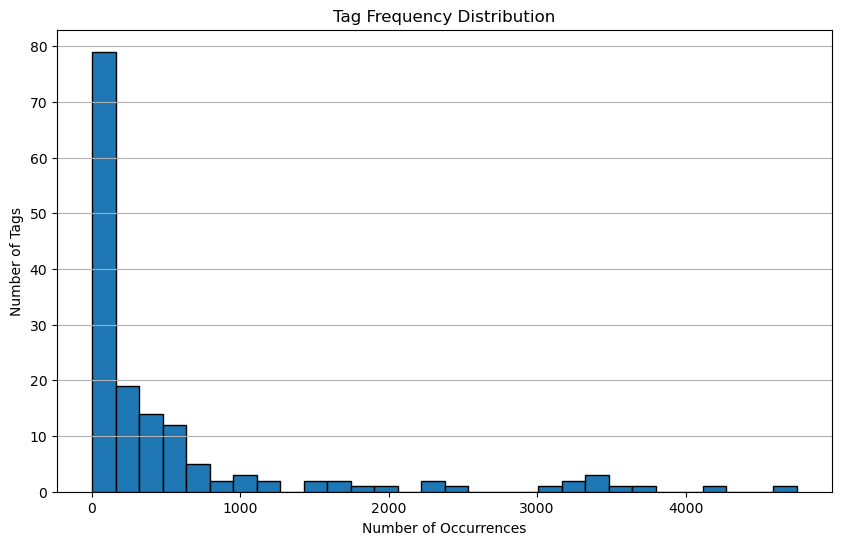

In [26]:
import matplotlib.pyplot as plt

# Get tag counts as a list
tag_count_values = list(tag_counts.values())

plt.figure(figsize=(10,6))
plt.hist(tag_count_values, bins=30, edgecolor='black')
plt.title('Tag Frequency Distribution')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Tags')
plt.grid(axis='y')
plt.show()

In [27]:
freq_threshold = 20
frequent_tags = [tag for tag, count in tag_counts.items() if count > freq_threshold]
print(f"Frequent tags (>20 occurrences): {len(frequent_tags)}")

total_ohe_columns = unique_cities + unique_states + len(frequent_tags)
print(f"Estimated total OHE columns after merging rare cities/states and threshold 20 tags: {total_ohe_columns}")

Frequent tags (>20 occurrences): 134
Estimated total OHE columns after merging rare cities/states and threshold 20 tags: 243


### Dealing with Cities


- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean


In [28]:
print(df.columns)
print(df['description'].iloc[0])
print(type(df['description'].iloc[0]))
# extract sold_price from 'description' column
df['Sold Price'] = df['description'].apply(lambda x: x.get('sold_price', None))

Index(['tags', 'permalink', 'status', 'list_date', 'description', 'branding',
       'lead_attributes', 'property_id', 'photos', 'flags', 'community',
       'virtual_tours', 'listing_id', 'price_reduced_amount', 'location',
       'matterport', 'city', 'state'],
      dtype='object')
{'year_built': 2001, 'baths_3qtr': None, 'sold_date': '2024-01-16', 'sold_price': 345000, 'baths_full': 2, 'name': None, 'baths_half': None, 'lot_sqft': 22651, 'sqft': 1539, 'baths': 2, 'sub_type': None, 'baths_1qtr': None, 'garage': 2, 'stories': 1, 'beds': 3, 'type': 'single_family'}
<class 'dict'>


In [29]:
df['city'] = df['location'].apply(lambda x: x.get('address', {}).get('city') if isinstance(x, dict) else None)

In [30]:
from sklearn.model_selection import train_test_split

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Compute mean price by city using training data
city_means = train_df.groupby('city')['Sold Price'].mean()

# Global mean to fill unknown cities
global_mean = train_df['Sold Price'].mean()

# Create the new encoded columns as separate Series
train_city_encoded = train_df['city'].map(city_means)
test_city_encoded = test_df['city'].map(city_means).fillna(global_mean)

# Combine using concat all at once
train_df = pd.concat([train_df, train_city_encoded.rename('city_encoded')], axis=1)
test_df = pd.concat([test_df, test_city_encoded.rename('city_encoded')], axis=1)

# Defragment by making a copy 
train_df = train_df.copy()
test_df = test_df.copy()

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [31]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [32]:
import seaborn as sns
df['sold_price'] = df['description'].apply(lambda x: x.get('sold_price') if isinstance(x, dict) else None)

In [33]:
# OHE tags
tags_ohe = df['tags'].str.get_dummies(sep=',')

# combine with sold price
tags_with_sold_price = pd.concat([tags_ohe, df['sold_price']], axis=1)

# drop rows with missing sold_price (if any)
tags_with_sold_price = tags_with_sold_price.dropna(subset=['sold_price'])

# compute correlation
tag_price_corr = tags_with_sold_price.corr()['sold_price'].drop('sold_price')

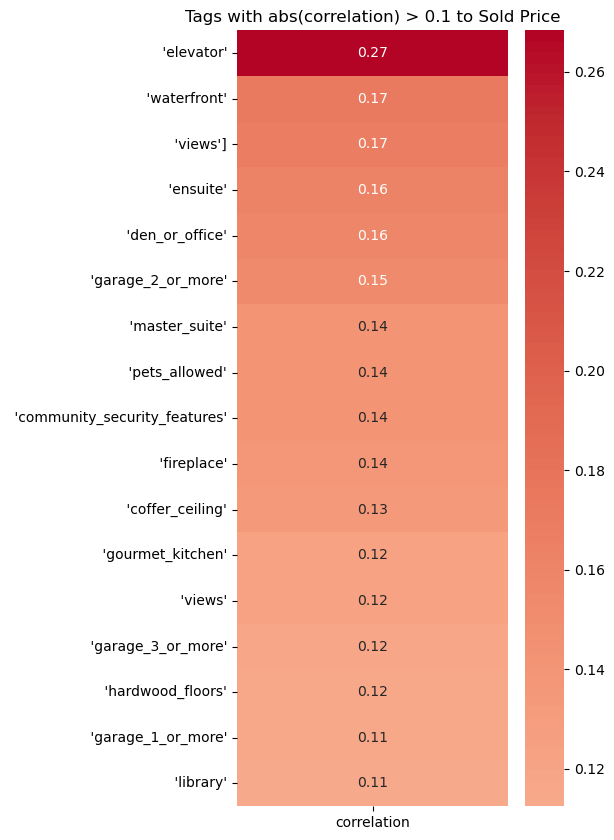

In [34]:
# Filter tags with absolute correlation > 0.1
threshold = 0.1
strong_corr_tags = tag_price_corr[tag_price_corr.abs() > threshold]

# Convert to DataFrame and sort
strong_corr_df = strong_corr_tags.to_frame(name='correlation').sort_values(by='correlation', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, len(strong_corr_df) * 0.5))
sns.heatmap(strong_corr_df, annot=True, cmap='coolwarm', center=0)
plt.title(f'Tags with abs(correlation) > {threshold} to Sold Price')
plt.tight_layout()
plt.show()

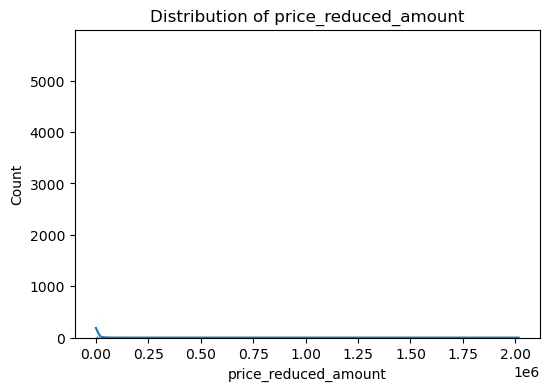

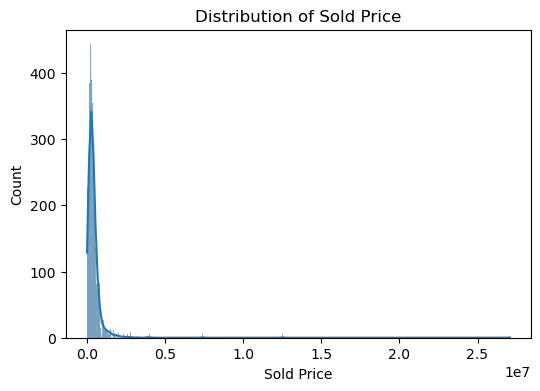

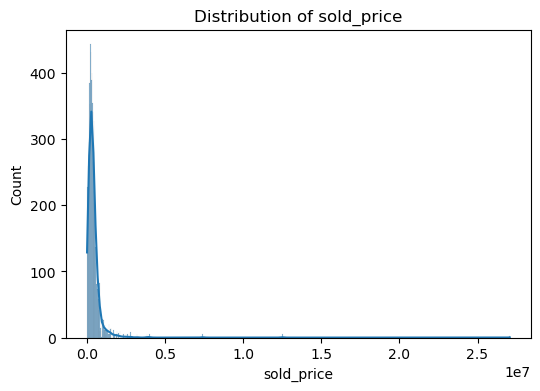

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
df[numerical_cols].skew().sort_values(ascending=False)

df['log_price'] = np.log1p(df['sold_price'])

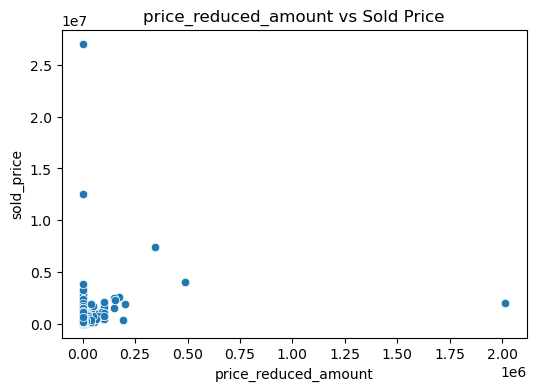

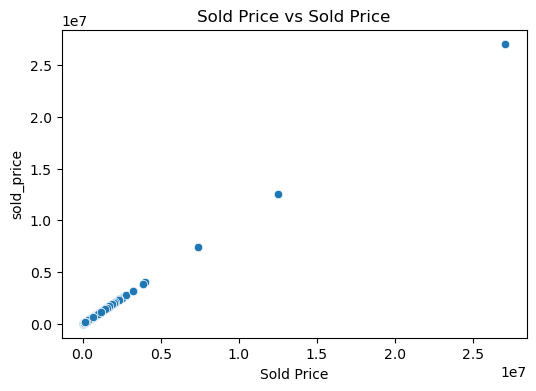

In [39]:
for col in numerical_cols:
    if col != 'sold_price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y='sold_price')
        plt.title(f'{col} vs Sold Price')
        plt.show()

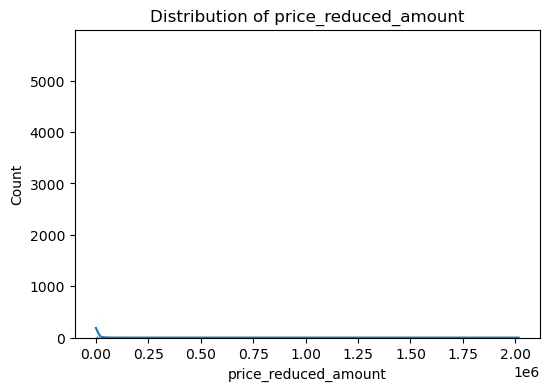

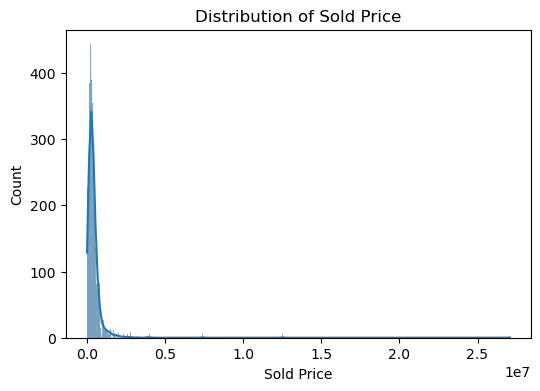

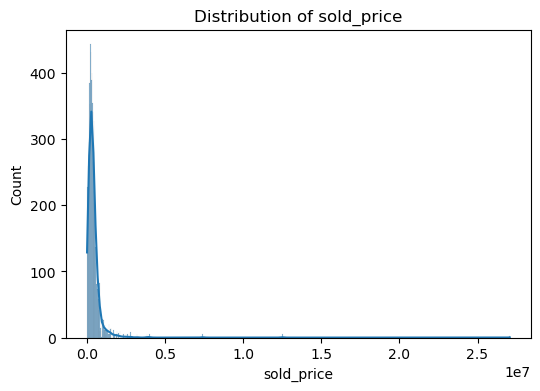

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [42]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numerical_cols = df.select_dtypes(include='number').columns

# Initialize scaler and fit-transform
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [44]:
# Create a processed folder if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save the processed DataFrame
df_scaled.to_csv('data/processed/df_scaled.csv', index=False)